<a href="https://colab.research.google.com/github/NguyenSang2003/Machine-Learning/blob/main/edm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from prettytable import PrettyTable
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import GridSearchCV

In [31]:
# Tải dataset EDM lên
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Data_Labs_ML/ProjectML/Project/Dataset_EDM'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/.shortcut-targets-by-id/1UgMwDIEZn9bzdX3kcIvEYUOzedz3KWS9/Project/Dataset_EDM


In [32]:
# Điều chỉnh tỷ lệ lấy mẫu tại đây
sample_fraction = 0.8  # Thay đổi giá trị này để lấy mẫu với tỷ lệ khác

In [46]:
# Đọc dữ liệu từ cả hai tệp CSV
train_data = pd.read_csv("train_data_final.csv")
test_data = pd.read_csv("test_data_final.csv")

# Giảm kích thước tập dữ liệu
train_data_sampled = train_data.sample(frac = sample_fraction, random_state=42)
test_data_sampled = test_data.sample(frac = sample_fraction, random_state=42)

# Tách dữ liệu thành các đặc trưng (features) và nhãn (labels)
X_train = train_data_sampled.drop('label', axis=1)
y_train = train_data_sampled['label']
X_test = test_data_sampled.drop('label', axis=1)
y_test = test_data_sampled['label']

# Mã hóa nhãn thành các giá trị số
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

train_data_sampled = train_data.sample(frac=sample_fraction, random_state=42)
test_data_sampled = test_data.sample(frac=sample_fraction, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train_encoded)
y_pred_lr = linear_regressor.predict(X_test)
y_pred_lr = y_pred_lr.round().astype(int)  # Làm tròn dự đoán thành các giá trị nhãn


# Tính toán các chỉ số đánh giá cho Linear Regression
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro')
}

results_lr = []

for name, metric in metrics.items():
    results_lr.append(metric(y_test_encoded, y_pred_lr))

# Tạo bảng bằng PrettyTable cho Linear Regression
table_lr = PrettyTable()
table_lr.field_names = ["Metric", "Linear Regression"]

for name, value in zip(metrics.keys(), results_lr):
    table_lr.add_row([name, value])

print("Linear Regression Results")
print(table_lr)

Linear Regression Results
+-----------+---------------------+
|   Metric  |  Linear Regression  |
+-----------+---------------------+
|  Accuracy |      0.0921875      |
| Precision | 0.10182310485482639 |
|   Recall  | 0.06790221258516432 |
|  F1 Score | 0.05789348824628071 |
+-----------+---------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Random Forest
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train_encoded)
y_pred_rf = random_forest_regressor.predict(X_test)
y_pred_rf = y_pred_rf.round().astype(int)  # Làm tròn dự đoán thành các giá trị nhãn

# Tính toán các chỉ số đánh giá cho Random Forest
results_rf = []

for name, metric in metrics.items():
    results_rf.append(metric(y_test_encoded, y_pred_rf))

# Tạo bảng bằng PrettyTable cho Random Forest
table_rf = PrettyTable()
table_rf.field_names = ["Metric", "Random Forest"]

for name, value in zip(metrics.keys(), results_rf):
    table_rf.add_row([name, value])

print("Random Forest Results")
print(table_rf)

Random Forest Results
+-----------+---------------------+
|   Metric  |    Random Forest    |
+-----------+---------------------+
|  Accuracy |      0.21578125     |
| Precision | 0.26307558828239935 |
|   Recall  | 0.21690536455982673 |
|  F1 Score | 0.19623893740119702 |
+-----------+---------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


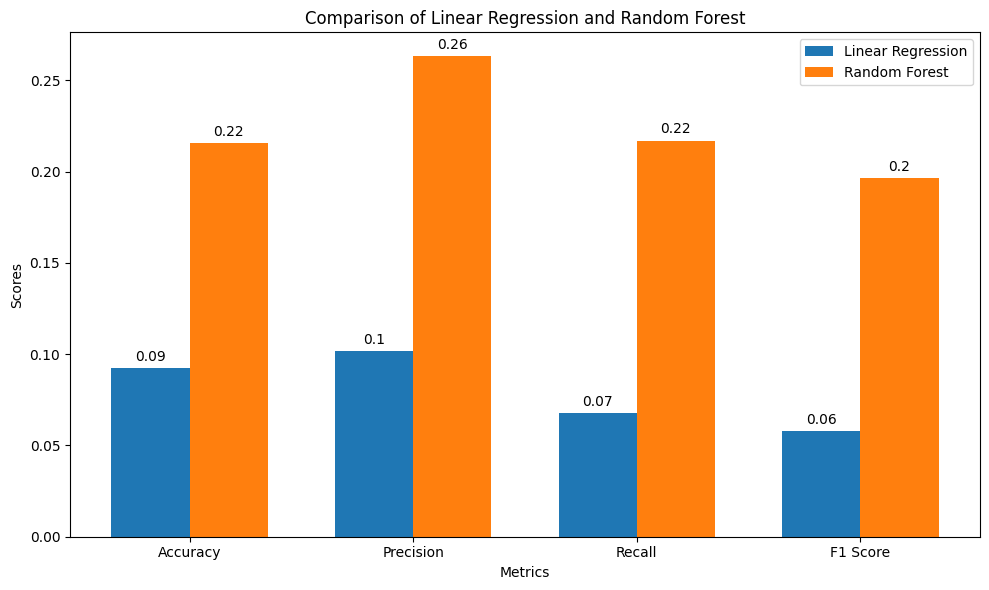

In [45]:
# Tính toán các chỉ số đánh giá cho Random Forest
results_rf = {name: metric(y_test_encoded, y_pred_rf) for name, metric in metrics.items()}

# Tính toán các chỉ số đánh giá cho Linear Regression
results_lr = {name: metric(y_test_encoded, y_pred_lr) for name, metric in metrics.items()}

# Vẽ biểu đồ
metrics_names = list(metrics.keys())
lr_scores = [results_lr[name] for name in metrics_names]
rf_scores = [results_rf[name] for name in metrics_names]

x = np.arange(len(metrics_names))  # vị trí các nhãn
width = 0.35  # độ rộng của các thanh

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, lr_scores, width, label='Linear Regression')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Thêm nhãn, tiêu đề và tuỳ chỉnh
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Linear Regression and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names)
ax.legend()

# Hiển thị giá trị trên các thanh
def autolabel(rects):
    """Hàm thêm nhãn vào các thanh"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)
print("Best parameters:", grid_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 